In [ ]:
import random
class Environment :
  def __init__(self):
    self.steps_left=10
  def get_observation(self):
    return[0.0,0.0,0.0,0.0]
  def get_actions(self):
    return[0,1]
  def is_done(self):
    return self.steps_left==0
  def action(self,action):
    if self.is_done():
      print("game over")
    self.steps_left-=1
    return random.random()







In [ ]:
class Agent:
  def __init__(self):
    self.total_reward=0.0
  def steps(self,env):
    current_obs=env.get_observation()
    actions=env.get_observation()
    reward=env.action(random.choice(actions))
    self.total_reward+=reward



In [ ]:
 # Instantiate the classess using constructors
env=Environment()
agent=Agent()
while not env.is_done():
  agent.steps(env)
print("the total reward is %d"% agent.total_reward)

the total reward is 6


In [ ]:
steps=[]
rewards=[]
for i in range(1,50,5):
  env=Environment()
  agent=Agent()
  while not env.is_done():
    agent.steps(env)
  steps.append(i)
  rewards.append(agent.total_reward)


In [ ]:
import pandas as pd
df=pd.DataFrame({"steps":steps,"rewards":rewards
})
df

,steps,rewards
0,1,5.120370
1,6,5.625784
2,11,3.769178
3,16,4.999234
4,21,4.691257
5,26,5.445466
6,31,3.769240
7,36,4.676093
8,41,4.090535
9,46,4.295483


import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6553746979635205301, *['steps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6553746979635205301, *['rewards'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6553746979635205301, *['steps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6553746979635205301, *['rewards'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6553746979635205301, *[[['steps', 'rewards']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6553746979635205301, *['steps', 'rewards', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6553746979635205301, *['steps', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6553746979635205301, *['steps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6553746979635205301, *['rewards'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6553746979635205301, *['steps'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6553746979635205301, *['rewards'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6553746979635205301, *[[['steps', 'rewards']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6553746979635205301, *['steps', 'rewards', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6553746979635205301 = autoviz.get_df('df_6553746979635205301')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6553746979635205301, *['steps', 'count()', None], **{})
chart

<Axes: xlabel='steps'>

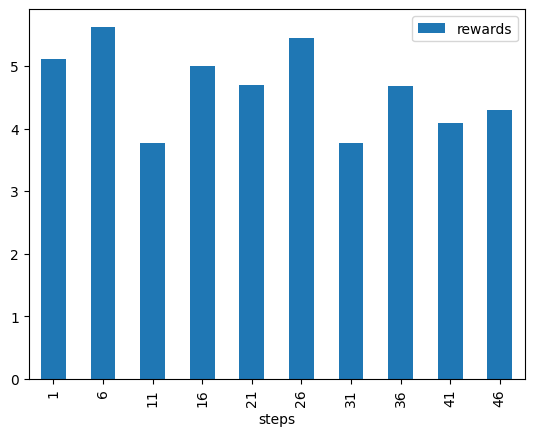

In [ ]:
df.plot.bar(x="steps")

In [ ]:
import random  # Import the random module to generate random numbers.

class Environment:
    def __init__(self):
        self.steps_left = 10  # Initialize the number of steps left to 10.

    def get_observation(self):
        return [0.0, 0.0, 0.0, 0.0]  # Return a fixed observation list with four elements all set to 0.0.

    def get_actions(self):
        return [0, 1]  # Return a list of available actions, [0, 1] in this case.

    def is_done(self):
        return self.steps_left == 0  # Return True if there are no steps left (steps_left is 0), otherwise False.

    def action(self, action):
        if self.is_done():
            print("Game over")  # If the game is already over, print "Game over".

        self.steps_left -= 1  # Decrease the number of steps left by 1.
        return random.random()  # Return a random float between 0 and 1.

# The Environment class defines a simple environment with methods to get observations, actions, and perform actions.

class Agent:
    def __init__(self):
        self.total_reward = 0.0  # Initialize the total reward of the agent to 0.0.

    def steps(self, env):
        current_obs = env.get_observation()  # Get the current observation from the environment.
        actions = env.get_actions()  # Get the available actions from the environment.
        reward = env.action(random.choice(actions))  # Choose a random action, perform it in the environment, and get the reward.
        self.total_reward += reward  # Update the total reward of the agent with the obtained reward.

# The Agent class defines a simple agent that can interact with the environment and collect rewards.

# Instantiate the classes using constructors.
env = Environment()  # Create an instance of the Environment class.
agent = Agent()  # Create an instance of the Agent class.

while not env.is_done():  # Continue the loop until the environment is done (steps_left becomes 0).
    agent.steps(env)  # Agent takes a step in the environment.

# Print the total reward obtained by the agent after interacting with the environment.
print("The total reward is %f" % agent.total_reward)


The total reward is 4.793357


In [ ]:
steps = []    # Create an empty list to store the values of 'i'.
rewards = []  # Create an empty list to store the total rewards obtained by the agent.

# Loop from 1 to 49 (inclusive), with a step size of 5.
for i in range(1, 50, 5):
    env = Environment()  # Create an instance of the Environment class.
    agent = Agent()      # Create an instance of the Agent class.

    # Continue the loop until the environment is done (i.e., all steps are used).
    while not env.is_done():
        agent.steps(env)  # Agent takes a step in the environment.

    steps.append(i)     # Add the value of 'i' to the 'steps' list.
    rewards.append(agent.total_reward)  # Add the total reward obtained by the agent to the 'rewards' list.

# The loop repeats for different values of 'i' (1, 6, 11, ..., 46).

# After the loop, the 'steps' list will contain [1, 6, 11, ..., 46], and the 'rewards' list will contain the total rewards obtained for each scenario.

# The lists 'steps' and 'rewards' will be used to analyze and visualize how the total reward varies with different values of 'i'.

import pandas as pd
df=pd.DataFrame({"steps":steps,"rewards":rewards
})
df

,steps,rewards
0,1,4.670371
1,6,5.798093
2,11,4.403257
3,16,4.876947
4,21,4.210805
5,26,5.158621
6,31,4.778753
7,36,4.997821
8,41,3.642197
9,46,4.416673


In [ ]:
# Assignment 1:

# Define an environment and build a simple agent program to perform random actions. Initialize step count to 100.
# Compute the cumulative reward for the random actions performed by the agent.
# Plot the graph by varying steps in range of 2 and report your observations on actions and rewards.

import random
class Environment :
  def __init__(self):
    self.steps_left=100
  def get_observation(self):
    return[0.0,0.0,0.0,0.0]
  def get_actions(self):
    return[0,1]
  def is_done(self):
    return self.steps_left==0
  def action(self,action):
    if self.is_done():
      print("game over")
    self.steps_left-=1
    return random.random()
 # Instantiate the classess using constructors
env=Environment()
agent=Agent()
while not env.is_done():
  agent.steps(env)
print("the total reward is %d"% agent.total_reward)

the total reward is 47


In [ ]:
steps=[]
rewards=[]
for i in range(1,50,2):
  env=Environment()
  agent=Agent()
  while not env.is_done():
    agent.steps(env)
  steps.append(i)
  rewards.append(agent.total_reward)

In [ ]:
import pandas as pd
df=pd.DataFrame({"steps":steps,"rewards":rewards
})
df

,steps,rewards
0,1,50.928338
1,3,50.779385
2,5,51.950746
3,7,49.423820
4,9,53.597799
5,11,54.161209
6,13,52.007782
7,15,44.739363
8,17,46.512329
9,19,44.483438


<Axes: xlabel='steps'>

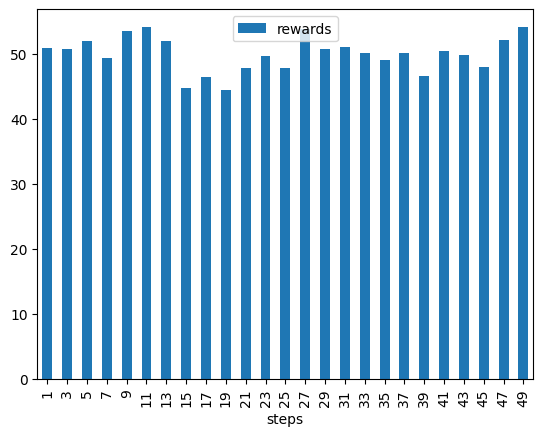

In [ ]:
df.plot.bar(x="steps")